In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\volatility\CBOE_CIV, 1D.csv',index_col='time', parse_dates=True)

In [21]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

In [22]:
len(log_diff)

1768

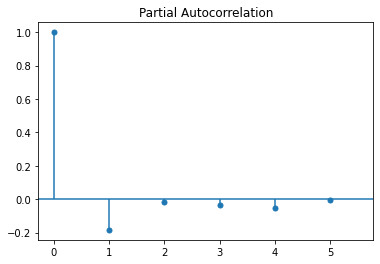

In [23]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

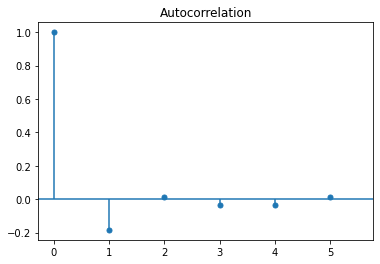

In [24]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

In [25]:
print(len(arma_df))

1769


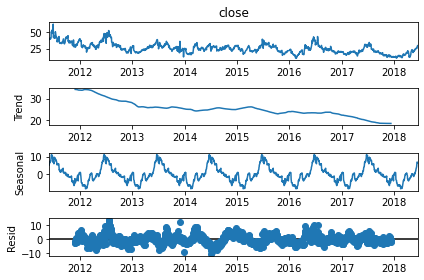

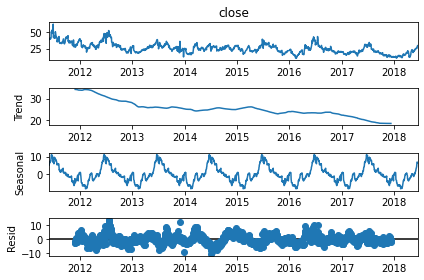

In [26]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

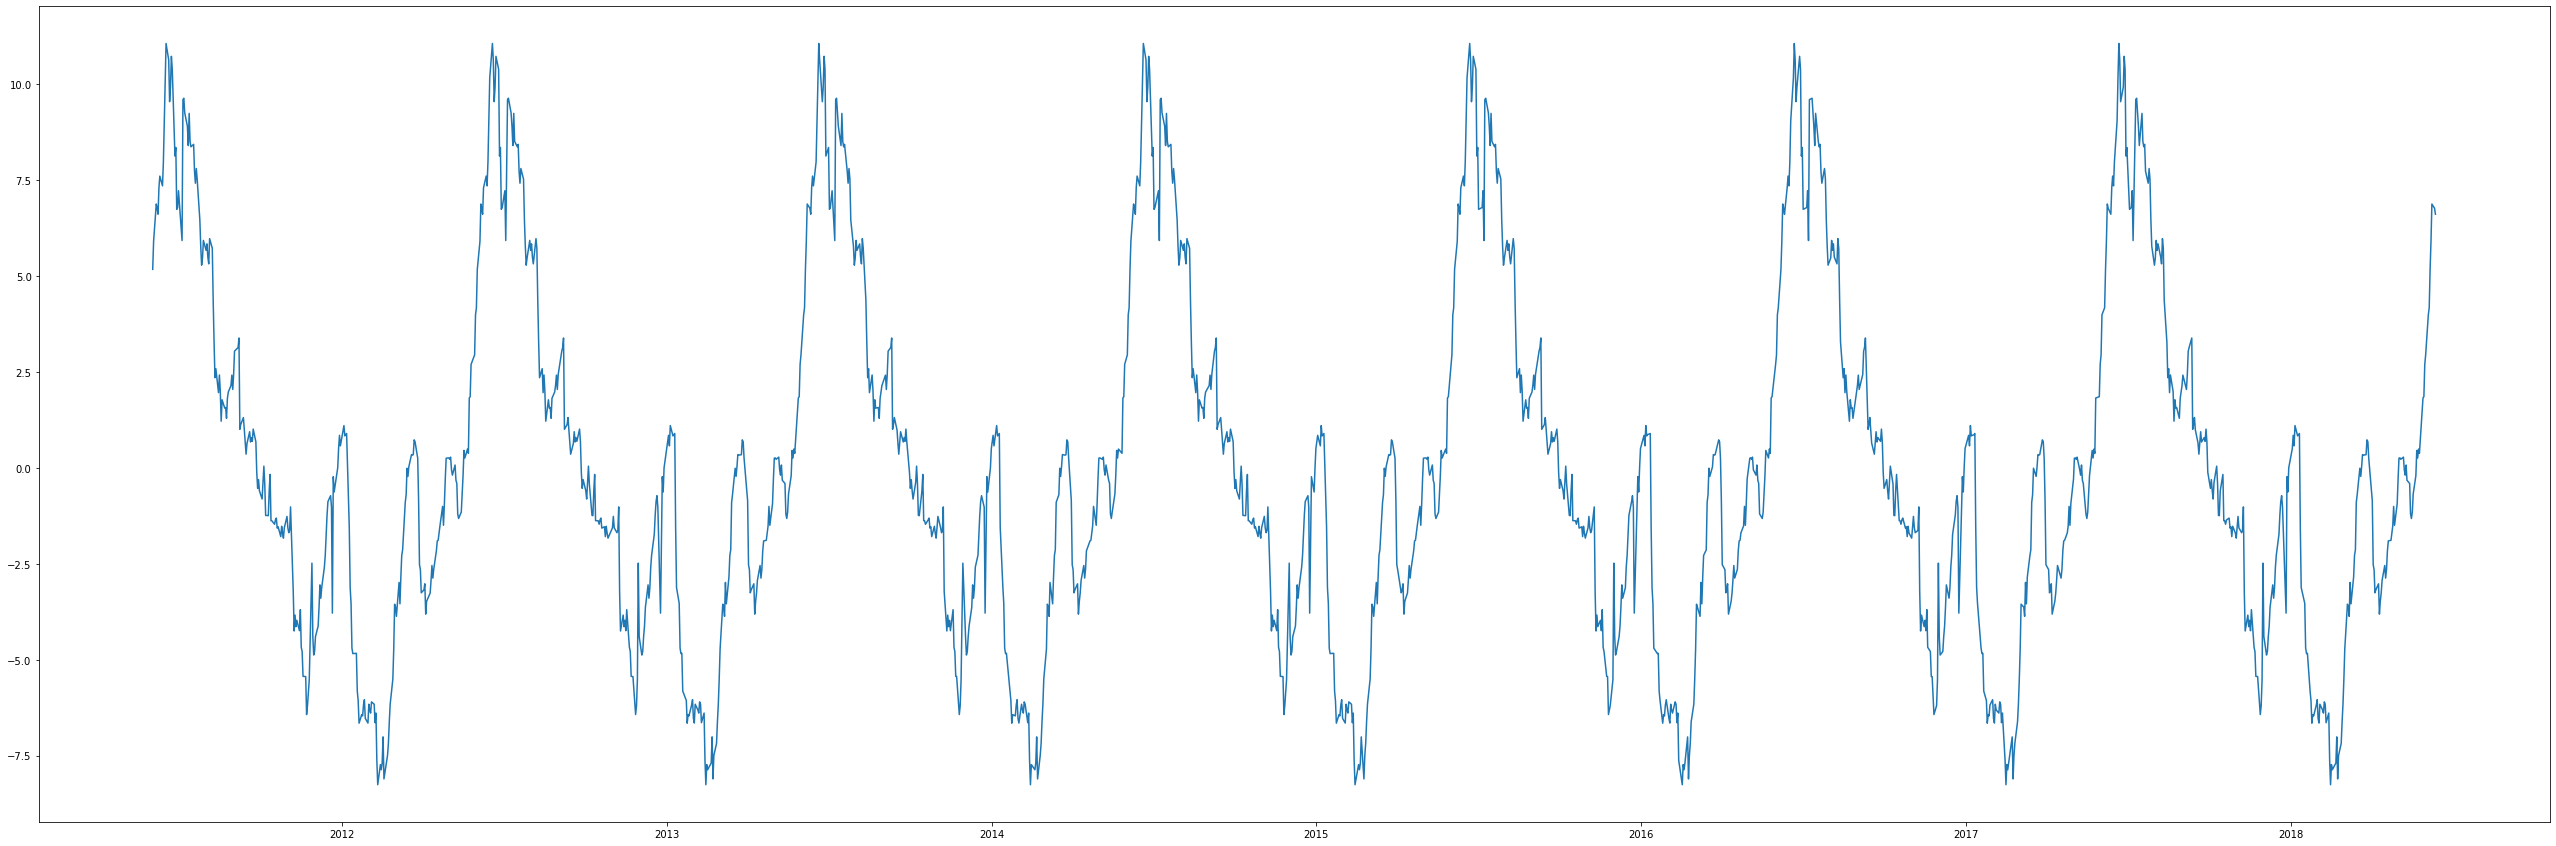

In [27]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

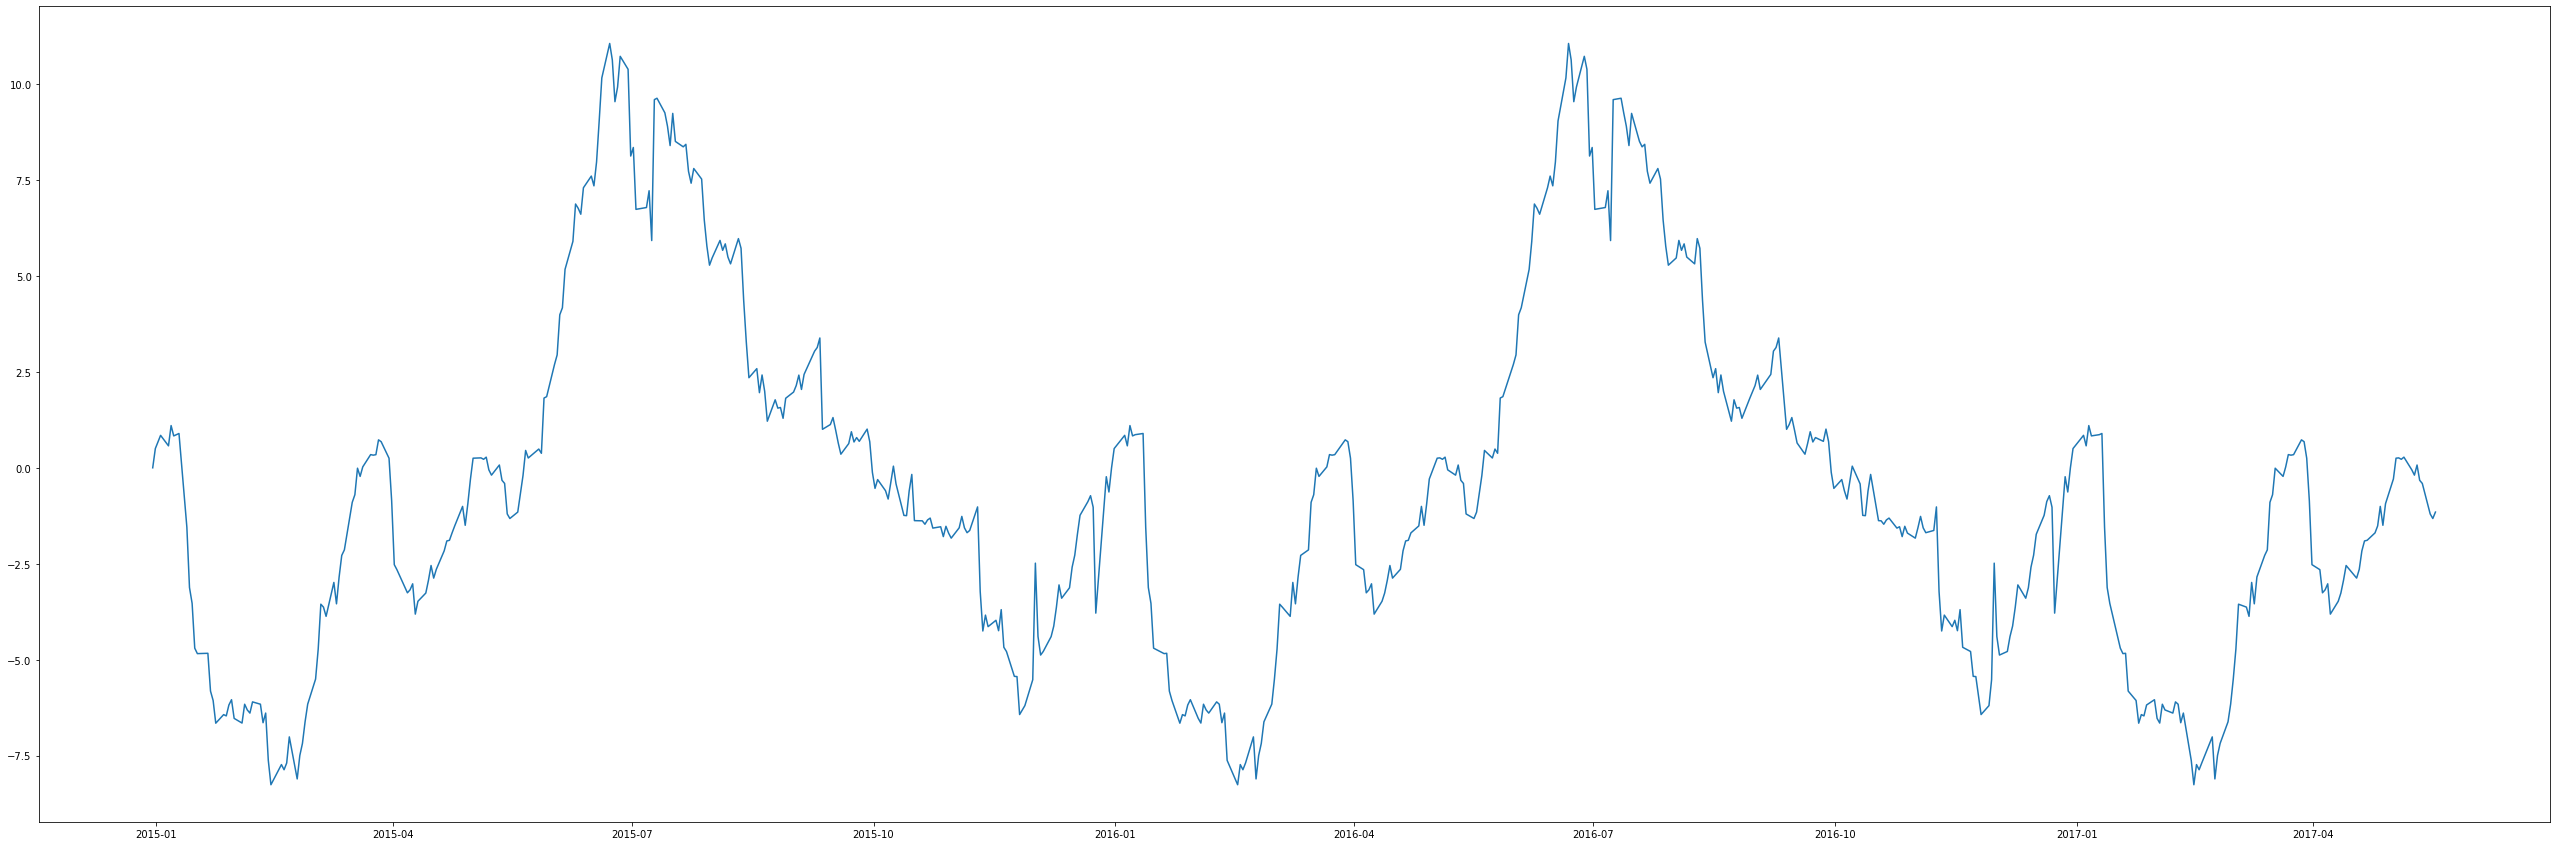

In [28]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

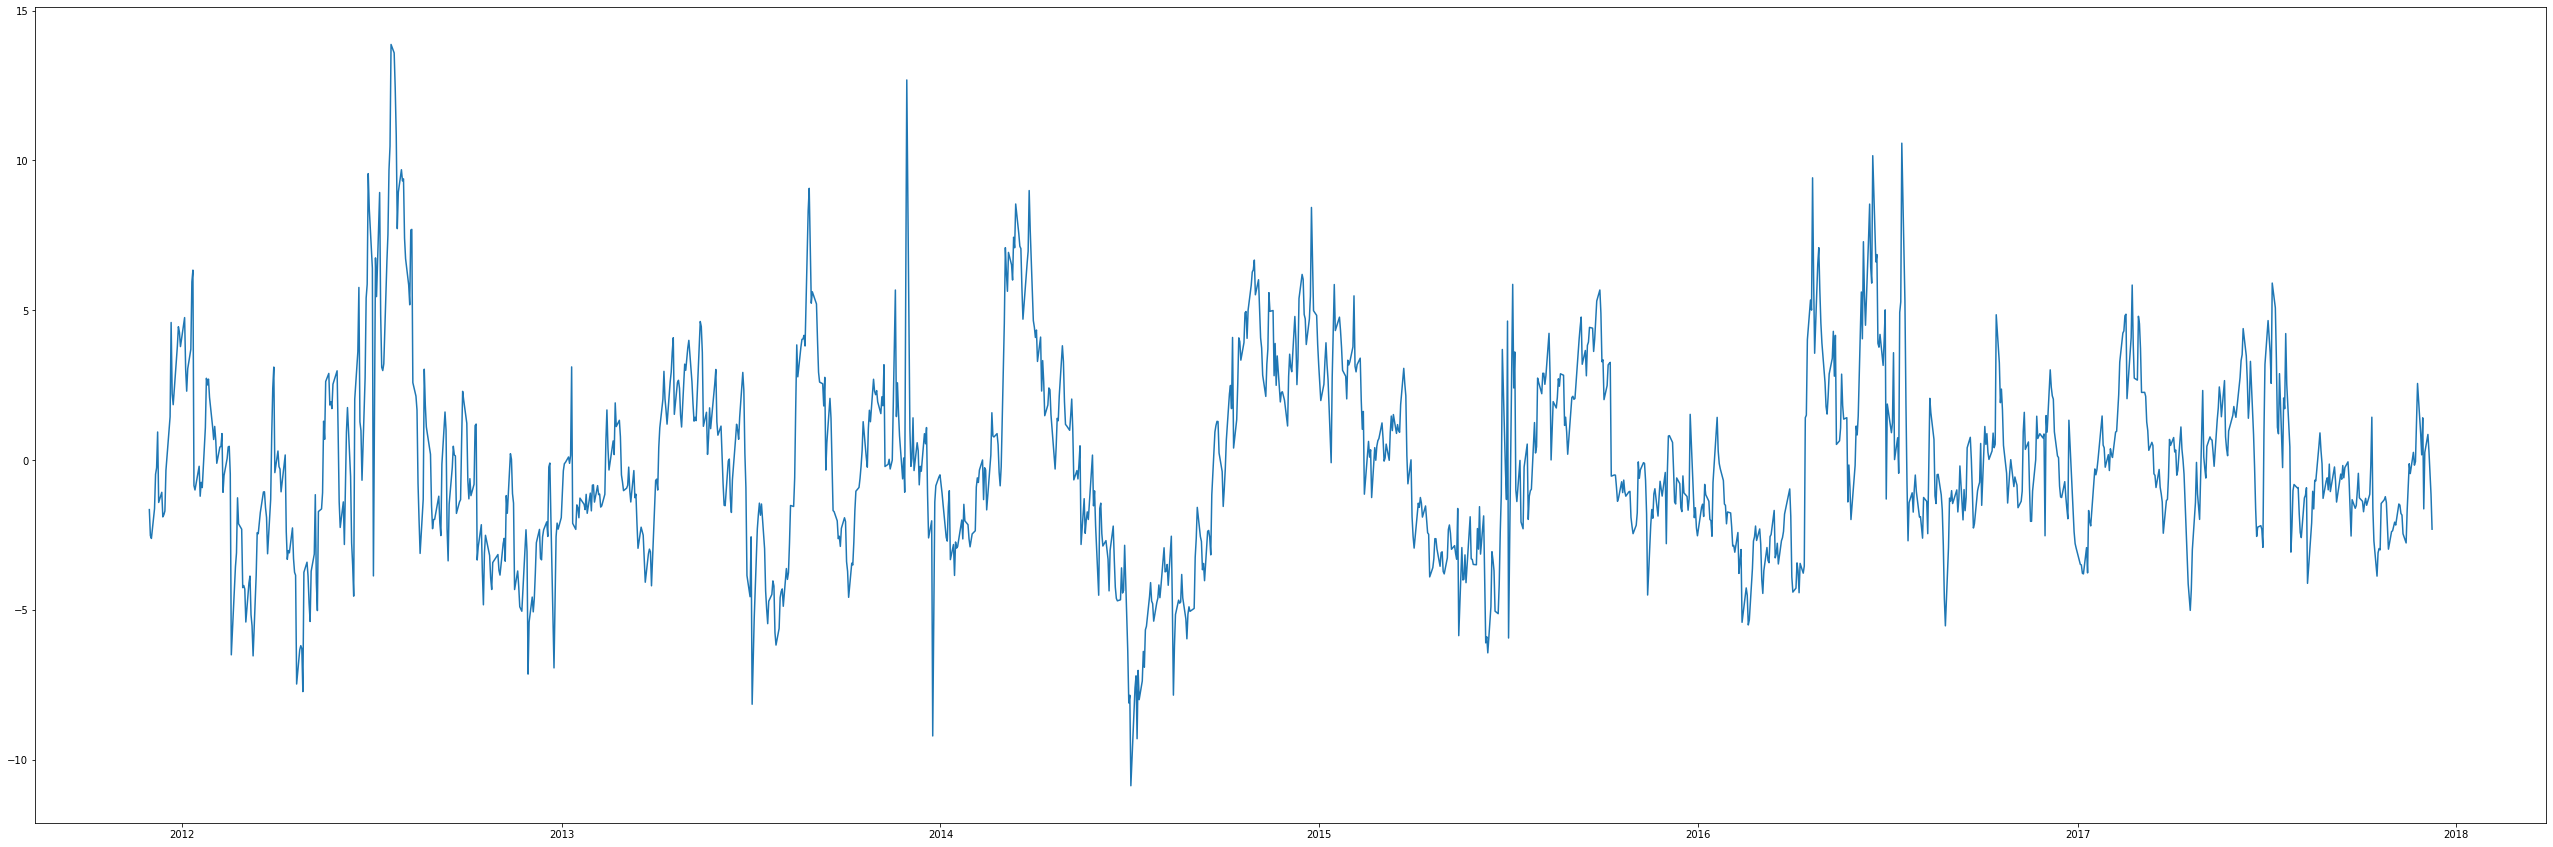

In [29]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [30]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

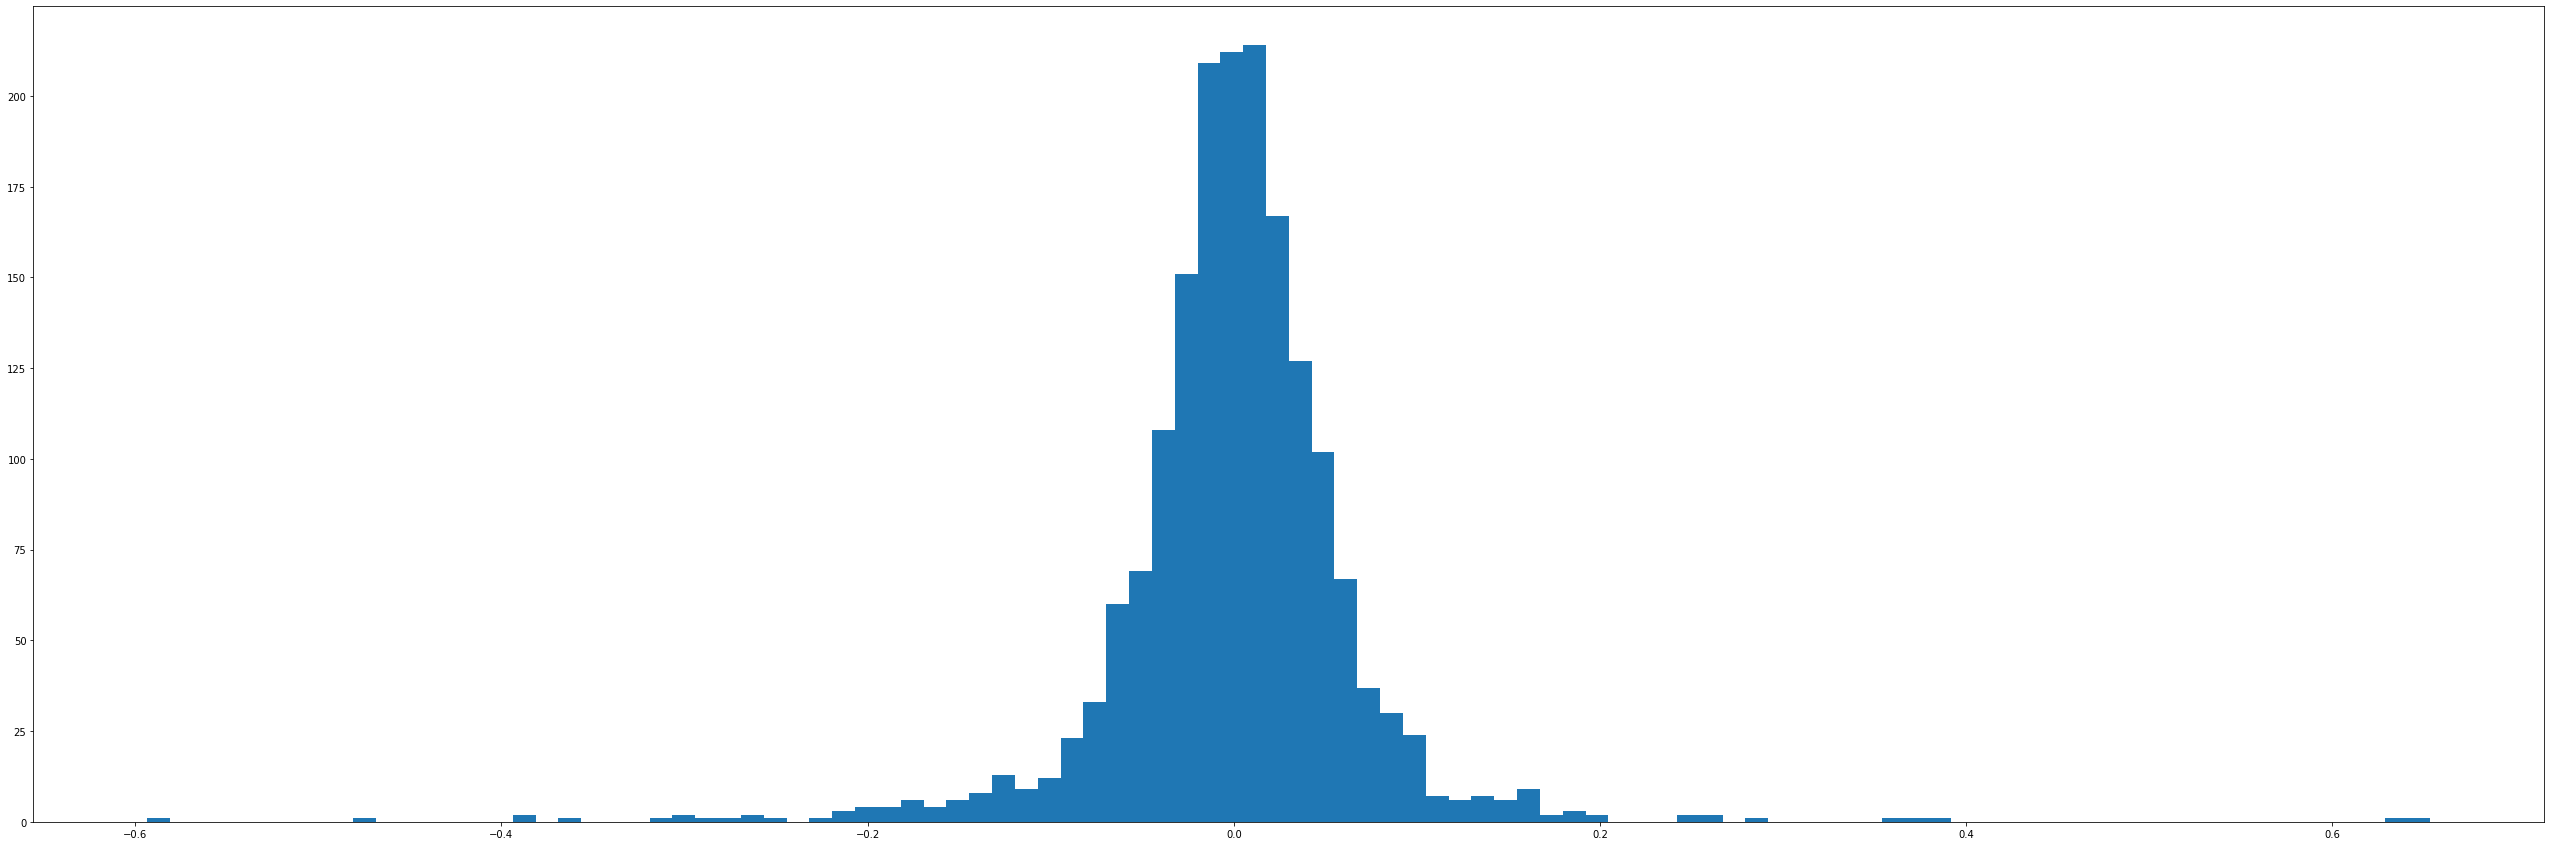

In [31]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

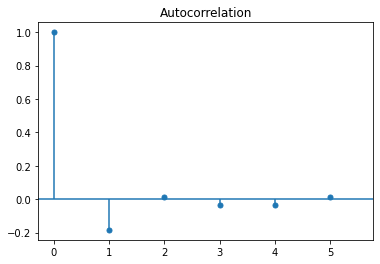

In [32]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

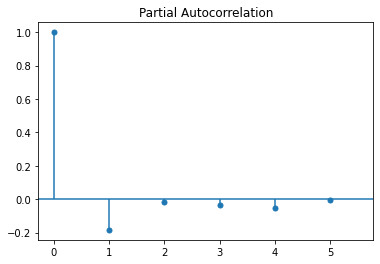

In [33]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("pacf.jpg")